In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul  6 18:50:13 2020

@author: sadievrenseker
"""

#kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#kodlar
#veri yukleme

veriler = pd.read_csv("eksikveriler.csv")
#pd.read_csv("veriler.csv")

print(veriler)

#veri on isleme

boy = veriler[['boy']]
# print(boy)

boykilo = veriler[['boy','kilo']]
# print(boykilo)

x = 10

class insan:
    boy = 180
    def kosmak(self,b):
        return b + 10

ali = insan()
print(ali.boy)
print(ali.kosmak(90))

#eksik veriler
#sci - kit learn

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

Yas = veriler.iloc[:,1:4].values

imputer = imputer.fit(Yas[:,1:4])
Yas[:,1:4] = imputer.transform(Yas[:,1:4])



   ulke  boy  kilo   yas cinsiyet
0    tr  130    30  10.0        e
1    tr  125    36  11.0        e
2    tr  135    34  10.0        k
3    tr  133    30   9.0        k
4    tr  129    38  12.0        e
5    tr  180    90  30.0        e
6    tr  190    80  25.0        e
7    tr  175    90  35.0        e
8    tr  177    60  22.0        k
9    us  185   105  33.0        e
10   us  165    55  27.0        k
11   us  155    50  44.0        k
12   us  160    58   NaN        k
13   us  162    59  41.0        k
14   us  167    62  55.0        k
15   fr  174    70  47.0        e
16   fr  193    90   NaN        e
17   fr  187    80  27.0        e
18   fr  183    88  28.0        e
19   fr  159    40  29.0        k
20   fr  164    66  32.0        k
21   fr  166    56  42.0        k
180
100


[ 1.1216405   2.84582493 -4.0607812 ]


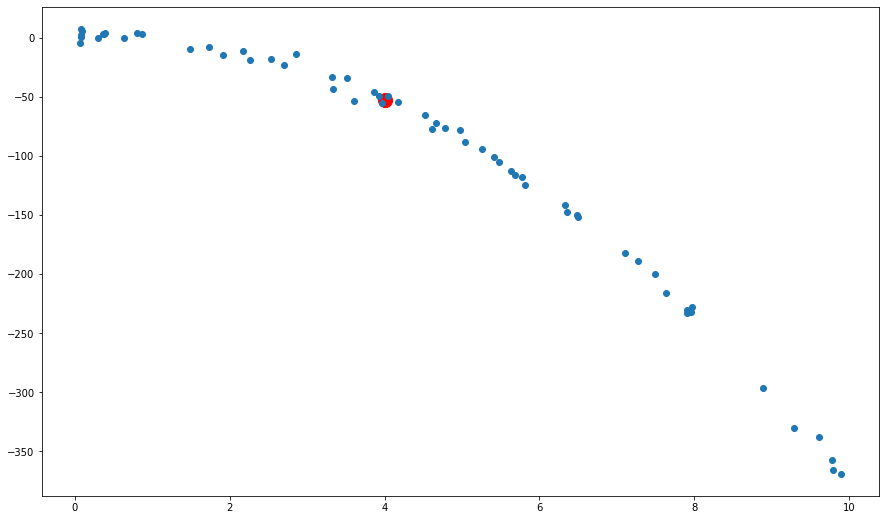

In [7]:
def polyval(p,x):
    n = len(p)
    y = 0
    for j in range(n):
        y+=p[j]*x**j
    return y

def gauss(a,b):
    n,_ = a.shape
    for k in range(n-1):
        for i in range(k+1,n):
            p = a[i,k]/a[k,k]
            for j in range(k,n):
                a[i,j] -= p*a[k,j]
            b[i]-=p*b[k]
    x = np.zeros(n)
    for i in range(n-1,-1,-1):
        t = b[i]
        for j in range(i+1,n):
            t -= a[i,j]*x[j]
        x[i] = t/a[i,i]
    return x
def polyfit(x,y,d = 1):
    n = x.size
    X = np.zeros((d+1,d+1))
    xy = np.zeros(d+1)
    for i in range(d+1):
        for j in range(d+1):
            for k in range(n):
                X[i,j] += (x[k]**i)*(x[k]**j)
        for k in range(n):
            xy[i] += y[k]*x[k]**i
    return gauss(X,xy)
plt.figure(figsize=(15,9))
n = 60
x = np.random.uniform(0,10,size = n)
y = 3+2*x-4*x**2 + np.random.normal(0,5,size = n)
plt.plot(x,y,"o")
b = polyfit(x,y,d=2)
print(b)

xx1 = np.random.randint(0,10)
yy1 = polyval(b,xx1)

plt.scatter(xx1,yy1,c="red",s=200)